In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('train.csv')

In [7]:
data.sample(5)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7568           DRK37         5.00               LF         0.000000   
5770           FDU47        12.80          Regular         0.114085   
668            FDL02        20.00          Regular         0.104245   
3285           FDG10         6.63          Regular         0.010937   
4721           FDK04          NaN          Low Fat         0.052059   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
7568   Soft Drinks  190.4530            OUT010                       1998   
5770        Breads  141.3838            OUT045                       2002   
668         Canned  105.3622            OUT049                       1999   
3285   Snack Foods   55.8588            OUT035                       2004   
4721  Frozen Foods   55.5588            OUT027                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
7568         NaN               Tier 3      Grocery Store           379.5060  
5770         NaN               Tier 2  Supermarket Type1          2388.2246  
668       Medium               Tier 1  Supermarket Type1          1270.3464  
3285       Small               Tier 2  Supermarket Type1           801.6232  
4721      Medium               Tier 3  Supermarket Type3          1145.1760

In [8]:
data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
per = data.isnull().sum() * 100 / len(data)
print(per)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [10]:
data.duplicated().any()

False

In [11]:
data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [13]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [14]:
mean_weight = data['Item_Weight'].mean()
median_weight = data['Item_Weight'].median()
print(mean_weight)
print(median_weight)

12.857645184135976
12.6


In [15]:
data['Item_Weight']  = data['Item_Weight'].fillna(mean_weight)
data['Outlet_Size']  = data['Outlet_Size'].fillna(median_weight)

In [16]:
data.head(1)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0           FDA15          9.3          Low Fat         0.016047     Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1           3735.138

In [17]:
print("Original Weight variable variance", data['Item_Weight'].var())
print("Original Weight variable after mean imputaion variance", data['Item_Weight'].fillna(mean_weight).var())
print("Original Weight variable after median imputaion variance", data['Item_Weight'].fillna(median_weight).var())

Original Weight variable variance 17.86012173506058
Original Weight variable after mean imputaion variance 17.86012173506058
Original Weight variable after median imputaion variance 17.86012173506058


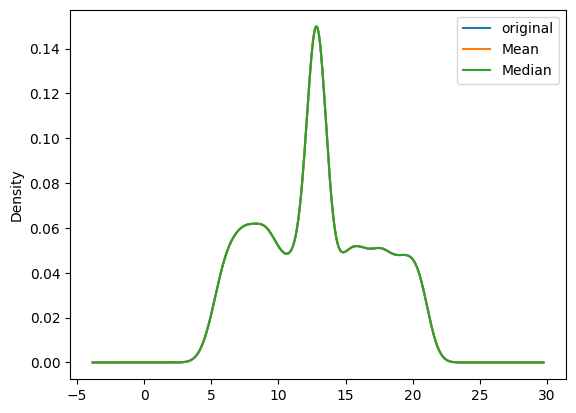

In [18]:
data['Item_Weight'].plot(kind='kde', label = "original")
data['Item_Weight'].plot(kind = "kde",label = "Mean")
data['Item_Weight'].plot(kind = "kde",label = "Median")
plt.legend()

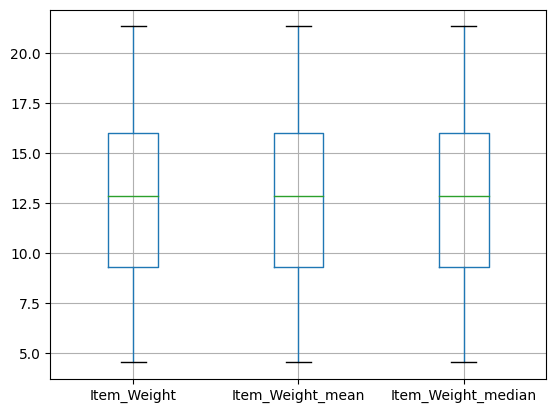

In [19]:
# Calculate the mean and median of 'Item_Weight'
mean_weight = data['Item_Weight'].mean()
median_weight = data['Item_Weight'].median()

# Fill missing values and create new columns
data['Item_Weight_mean'] = data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median'] = data['Item_Weight'].fillna(median_weight)

# Now you can create the boxplot
data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()
plt.show() # Don't forget to display the plot

In [20]:
data['Item_Weight_interploate']=data['Item_Weight'].interpolate(method="linear")

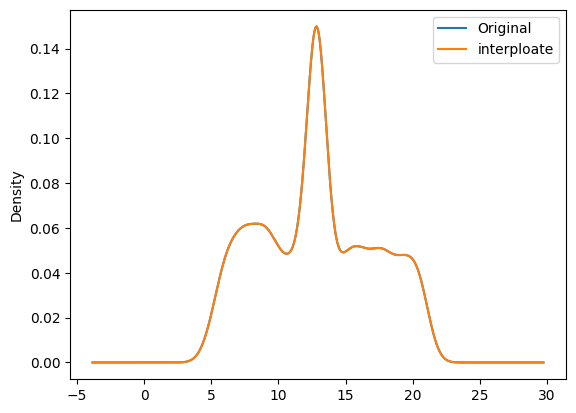

In [21]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['Item_Weight_interploate'].plot(kind = "kde",label = "interploate")

plt.legend()
plt.show()

In [22]:
from sklearn.impute import KNNImputer

In [23]:
knn = KNNImputer(n_neighbors=10,weights="distance")

In [24]:
data['knn_imputer']= knn.fit_transform(data[['Item_Weight']]).ravel()

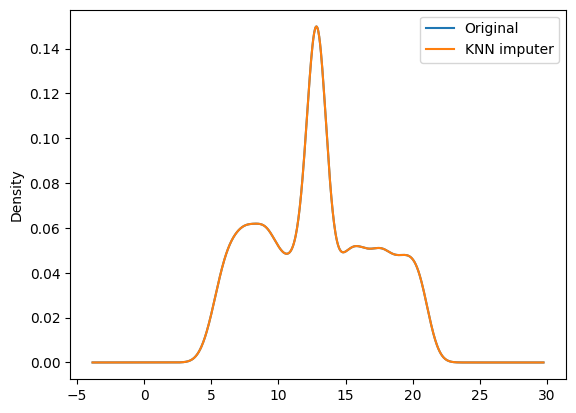

In [25]:

data['Item_Weight'].plot(kind = "kde",label="Original")

data['knn_imputer'].plot(kind = "kde",label = "KNN imputer")

plt.legend()
plt.show()

In [26]:
data = data.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median','knn_imputer'],axis=1)

In [27]:

data.head(1)

Item_Identifier Item_Fat_Content  Item_Visibility Item_Type  Item_MRP  \
0           FDA15          Low Fat         0.016047     Dairy  249.8092   

  Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1           3735.138   

   Item_Weight_interploate  
0                      9.3

In [28]:

data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interploate      0
dtype: int64

In [30]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
12.6      2410
Small     2388
High       932
Name: count, dtype: int64

In [31]:
data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [32]:
mode_outlet = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [33]:
mode_outlet

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size          12.6             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [34]:
missing_values = data['Outlet_Size'].isnull()

In [35]:
missing_values

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [36]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet[x])

In [37]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interploate      0
dtype: int64

In [38]:

data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interploate'],
      dtype='object')

In [39]:

data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [40]:
data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [41]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

In [42]:

data.columns


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interploate'],
      dtype='object')

In [43]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [44]:
data['Item_Visibility_interpolate']=data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [45]:
data.head(1)

Item_Identifier Item_Fat_Content  Item_Visibility Item_Type  Item_MRP  \
0           FDA15               LF         0.016047     Dairy  249.8092   

  Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1           3735.138   

   Item_Weight_interploate  Item_Visibility_interpolate  
0                      9.3                     0.016047

In [46]:
data['Item_Visibility_interpolate'].value_counts()

Item_Visibility_interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

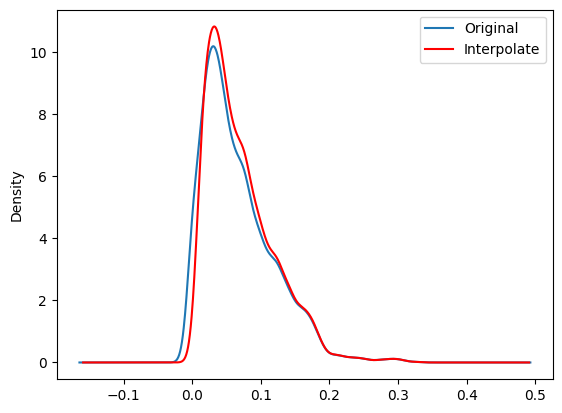

In [47]:
data['Item_Visibility'].plot(kind="kde",label="Original")

data['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()

In [48]:
data = data.drop('Item_Visibility',axis=1)

In [49]:
data.head(1)

Item_Identifier Item_Fat_Content Item_Type  Item_MRP Outlet_Identifier  \
0           FDA15               LF     Dairy  249.8092            OUT049   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   

         Outlet_Type  Item_Outlet_Sales  Item_Weight_interploate  \
0  Supermarket Type1           3735.138                      9.3   

   Item_Visibility_interpolate  
0                     0.016047

In [50]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_interpolate'],
      dtype='object')

In [51]:
data['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [52]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_interpolate'],
      dtype='object')

In [53]:
data['Item_Identifier'].value_counts().sample(5)

Item_Identifier
FDH22    2
FDY02    7
FDG32    7
FDE14    5
FDD51    6
Name: count, dtype: int64

In [54]:
data['Item_Identifier'] =data['Item_Identifier'].apply(lambda x : x[:2])

In [55]:
data['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [56]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_interpolate'],
      dtype='object')

In [57]:
data['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [58]:
import datetime as dt

In [59]:
current_year = dt.datetime.today().year

In [60]:
current_year

2024

In [61]:
data['Outlet_age']= current_year - data['Outlet_Establishment_Year']

In [62]:
data.head(1)

Item_Identifier Item_Fat_Content Item_Type  Item_MRP Outlet_Identifier  \
0              FD               LF     Dairy  249.8092            OUT049   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   

         Outlet_Type  Item_Outlet_Sales  Item_Weight_interploate  \
0  Supermarket Type1           3735.138                      9.3   

   Item_Visibility_interpolate  Outlet_age  
0                     0.016047          25

In [63]:
data = data.drop('Outlet_Establishment_Year',axis=1)

In [64]:

data.head()

Item_Identifier Item_Fat_Content              Item_Type  Item_MRP  \
0              FD               LF                  Dairy  249.8092   
1              DR          Regular            Soft Drinks   48.2692   
2              FD               LF                   Meat  141.6180   
3              FD          Regular  Fruits and Vegetables  182.0950   
4              NC               LF              Household   53.8614   

  Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  \
0            OUT049      Medium               Tier 1  Supermarket Type1   
1            OUT018      Medium               Tier 3  Supermarket Type2   
2            OUT049      Medium               Tier 1  Supermarket Type1   
3            OUT010        12.6               Tier 3      Grocery Store   
4            OUT013        High               Tier 3  Supermarket Type1   

   Item_Outlet_Sales  Item_Weight_interploate  Item_Visibility_interpolate  \
0          3735.1380                     9.30                     0.016047   
1           443.4228                     5.92                     0.019278   
2          2097.2700                    17.50                     0.016760   
3           732.3800                    19.20                     0.015755   
4           994.7052                     8.93                     0.014751   

   Outlet_age  
0          25  
1          15  
2          25  
3          26  
4          37

In [72]:
from sklearn.preprocessing import OrdinalEncoder

# Make a copy of the data
data_encoded = data.copy()

# Select only object (string) columns for encoding
cat_cols = data.select_dtypes(include=['object']).columns

# Convert all values to strings
data_encoded[cat_cols] = data_encoded[cat_cols].astype(str)

# Handle missing values (NaN) before encoding
data_encoded[cat_cols] = data_encoded[cat_cols].fillna('Missing')

# Initialize the encoder
oe = OrdinalEncoder()

# Apply the encoder to each categorical column
for col in cat_cols:
    data_encoded[col] = oe.fit_transform(data_encoded[[col]])

# Print the categories to verify
print(oe.categories_)


[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [73]:

data_encoded.head(3)

Item_Identifier  Item_Fat_Content  Item_Type  Item_MRP  Outlet_Identifier  \
0              1.0               0.0        4.0  249.8092                9.0   
1              0.0               1.0       14.0   48.2692                3.0   
2              1.0               0.0       10.0  141.6180                9.0   

   Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  \
0          2.0                   0.0          1.0          3735.1380   
1          2.0                   2.0          2.0           443.4228   
2          2.0                   0.0          1.0          2097.2700   

   Item_Weight_interploate  Item_Visibility_interpolate  Outlet_age  
0                     9.30                     0.016047          25  
1                     5.92                     0.019278          15  
2                    17.50                     0.016760          25

In [74]:
X = data_encoded.drop('Item_Outlet_Sales',axis=1)
y = data_encoded['Item_Outlet_Sales']

In [75]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [76]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5550374333274953


In [77]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5956392835487645


In [78]:

xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_

}).sort_values(by='XGBRF_importance',ascending=False)

feature  XGBRF_importance
7                   Outlet_Type          0.458964
4             Outlet_Identifier          0.187658
3                      Item_MRP          0.169415
10                   Outlet_age          0.156625
5                   Outlet_Size          0.011752
6          Outlet_Location_Type          0.006916
9   Item_Visibility_interpolate          0.003554
8       Item_Weight_interploate          0.001730
2                     Item_Type          0.001618
0               Item_Identifier          0.000902
1              Item_Fat_Content          0.000866

In [82]:
['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content']

['Item_Visibility_interpolate',
 'Item_Weight_interploate',
 'Item_Type',
 'Outlet_Location_Type',
 'Item_Identifier',
 'Item_Fat_Content']

In [80]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg1,X.drop(['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.5963078228839289


In [81]:
final_data = X.drop(columns=['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1)

In [83]:
final_data

Item_MRP  Outlet_Identifier  Outlet_Size  Outlet_Type  Outlet_age
0     249.8092                9.0          2.0          1.0          25
1      48.2692                3.0          2.0          2.0          15
2     141.6180                9.0          2.0          1.0          25
3     182.0950                0.0          0.0          0.0          26
4      53.8614                1.0          1.0          1.0          37
...        ...                ...          ...          ...         ...
8518  214.5218                1.0          1.0          1.0          37
8519  108.1570                7.0          0.0          1.0          22
8520   85.1224                6.0          3.0          1.0          20
8521  103.1332                3.0          2.0          2.0          15
8522   75.4670                8.0          3.0          1.0          27

[8523 rows x 5 columns]

In [84]:
from xgboost import XGBRFRegressor

In [85]:
xg_final = XGBRFRegressor()

In [86]:
xg_final.fit(final_data,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [88]:

X_train,X_test,y_train,y_test = train_test_split(final_data,y,
                                                 test_size=0.20,
                                                 random_state=42)

In [89]:
xg_final.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [90]:

y_pred = xg_final.predict(X_test)

In [91]:
mean_absolute_error(y_test,y_pred)

714.4517947934041

In [92]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2067.9636


In [93]:

print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

Sales Value is between 1353.543623046875 and 2782.383623046875


In [94]:

import joblib

In [95]:
joblib.dump(xg_final,'bigmart_model')

['bigmart_model']

In [96]:

model = joblib.load('bigmart_model')

In [97]:

pred = model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2067.9636


In [98]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

Sales Value is between 1353.543623046875 and 2782.383623046875


In [102]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

Sales Value is between 1353.543623046875 and 2782.383623046875


In [105]:
import numpy as np
import datetime as dt
import joblib

# Mock classes and variables to replace Tkinter components for testing
class MockStringVar:
    def __init__(self, value=""):
        self.value = value

    def get(self):
        return self.value

class MockEntry:
    def __init__(self, value=""):
        self.value = value

    def get(self):
        return self.value

# Set the current year
current_year = dt.datetime.today().year

def show_entry_fields():
    p1 = float(e1.get())

    text = clicked.get()
    outlet_identifier_mapping = {
        "OUT010": 0, "OUT013": 1, "OUT017": 2, "OUT018": 3, "OUT019": 4,
        "OUT027": 5, "OUT035": 6, "OUT045": 7, "OUT046": 8, "OUT049": 9
    }
    p2 = outlet_identifier_mapping.get(text, -1)
    print(p2)

    text0 = clicked0.get()
    outlet_size_mapping = {
        "High": 0, "Medium": 1, "Small": 2
    }
    p3 = outlet_size_mapping.get(text0, -1)
    print(p3)

    text1 = clicked1.get()
    outlet_type_mapping = {
        "Supermarket Type1": 1, "Supermarket Type2": 2,
        "Supermarket Type3": 3, "Grocery Store": 0
    }
    p4 = outlet_type_mapping.get(text1, -1)
    print(p4)

    p5 = current_year - int(e5.get())
    print(p5)

    model = joblib.load('bigmart_model')
    result = model.predict(np.array([[p1, p2, p3, p4, p5]]))

    print("Sales Amount is in between")
    print(float(result) - 714.42)
    print("and")
    print(float(result) + 714.42)
    print("Sales amount", result)

# Initialize mock variables
clicked = MockStringVar(value="OUT010")
clicked0 = MockStringVar(value="High")
clicked1 = MockStringVar(value="Grocery Store")
e1 = MockEntry(value="100.0")  # Example value for Item_MRP
e5 = MockEntry(value="2000")   # Example value for Outlet_Establishment_Year

# Execute the function for testing
show_entry_fields()


0
0
0
24
Sales Amount is in between
-512.8426379394531
and
915.9973620605468
Sales amount [201.57736]


In [106]:
import numpy as np
import datetime as dt
from tkinter import *
import joblib
current_year = dt.datetime.today().year
def show_entry_fields():
    p1=float(e1.get())
    #p4=float(e4.get())

    text = clicked.get()
    if text == "OUT010":
        p2=0
        print(p2)
    elif text=="OUT013":
        p2=1
        print(p2)
    elif text=="OUT017":
        p2=2
        print(p2)
    elif text=="OUT018":
        p2=3
        print(p2)
    elif text=="OUT019":
        p2=4
        print(p2)
    elif text=="OUT027":
        p2=5
        print(p2)
    elif text=="OUT035":
        p2=6
        print(p2)
    elif text=="OUT045":
        p2=7
        print(p2)
    elif text=="OUT046":
        p2=8
        print(p2)
    elif text=="OUT049":
        p2=9
        print(p2)
    text0 = clicked0.get()
    if text0 == "High":
        p3=0
        print(p3)
    elif text0=="Medium":
        p3=1
        print(p3)
    elif text0=="Small":
        p3=2
        print(p3)

    text1 = clicked1.get()
    if text1 == "Supermarket Type1":
        p4=1
        print(p4)
    elif text1=="Supermarket Type2":
        p4=2
        print(p4)
    elif text1=="Supermarket Type3":
        p4=3
        print(p4)
    elif text1=="Grocery Store":
        p4=0
        print(p4)

    p5=current_year - int(e5.get())
    print(p5)

    model = joblib.load('bigmart_model')
    result=model.predict(np.array([[p1,p2,p3,p4,p5]]))
    Label(master, text="Sales").grid(row=8)
    Label(master, text=result).grid(row=10)
    print("Sales amount", result)

master = Tk()
master.title("Big Mart Sales Prediction using Machine Learning")


label = Label(master, text = " Big Mart Sales Prediction using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

# Item_MRP	Outlet_Identifier	Outlet_Size	Outlet_Type	Outlet_age
Label(master, text="Item_MRP").grid(row=1)
Label(master, text="Outlet_Identifier").grid(row=2)
Label(master, text="Outlet_Size").grid(row=3)
Label(master, text="Outlet_Type").grid(row=4)
Label(master, text="Outlet_Establishment_Year").grid(row=5)


clicked = StringVar()
options = ['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049']

clicked0 = StringVar()

options0 = ['High', 'Medium', 'Small']

clicked1 = StringVar()
options1 = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3']

e1 = Entry(master)

e2 = OptionMenu(master , clicked , *options )
e2.configure(width=15)


e3 = OptionMenu(master , clicked0 , *options0 )
e3.configure(width=15)


e4 = OptionMenu(master , clicked1 , *options1 )
e4.configure(width=15)

e5 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

TclError: no display name and no $DISPLAY environment variable